# Решение

### Загрузка данных

In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Загрузка таблицы и вывод её первых пяти строк
df_sessions = pd.read_csv('ga_sessions.csv', low_memory=False)
df_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [3]:
df_hits = pd.read_csv('ga_hits-001.csv', low_memory=False)
df_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [4]:
# Создание клонов
df_sessions_clean = df_sessions.copy()
df_hits_clean = df_hits.copy()

### Проверка атрибутов

In [5]:
# Проверка данных на наличие пропусков в %
df_sessions_clean.isna().sum().sort_values(ascending=False) / len(df_sessions_clean)

device_model                0.991216
utm_keyword                 0.581740
device_os                   0.575330
device_brand                0.197403
utm_adcontent               0.180434
utm_campaign                0.118063
utm_source                  0.000052
geo_country                 0.000000
device_browser              0.000000
device_screen_resolution    0.000000
session_id                  0.000000
device_category             0.000000
client_id                   0.000000
utm_medium                  0.000000
visit_number                0.000000
visit_time                  0.000000
visit_date                  0.000000
geo_city                    0.000000
dtype: float64

Text(0.5, 1.0, 'Пропуски в признаках')

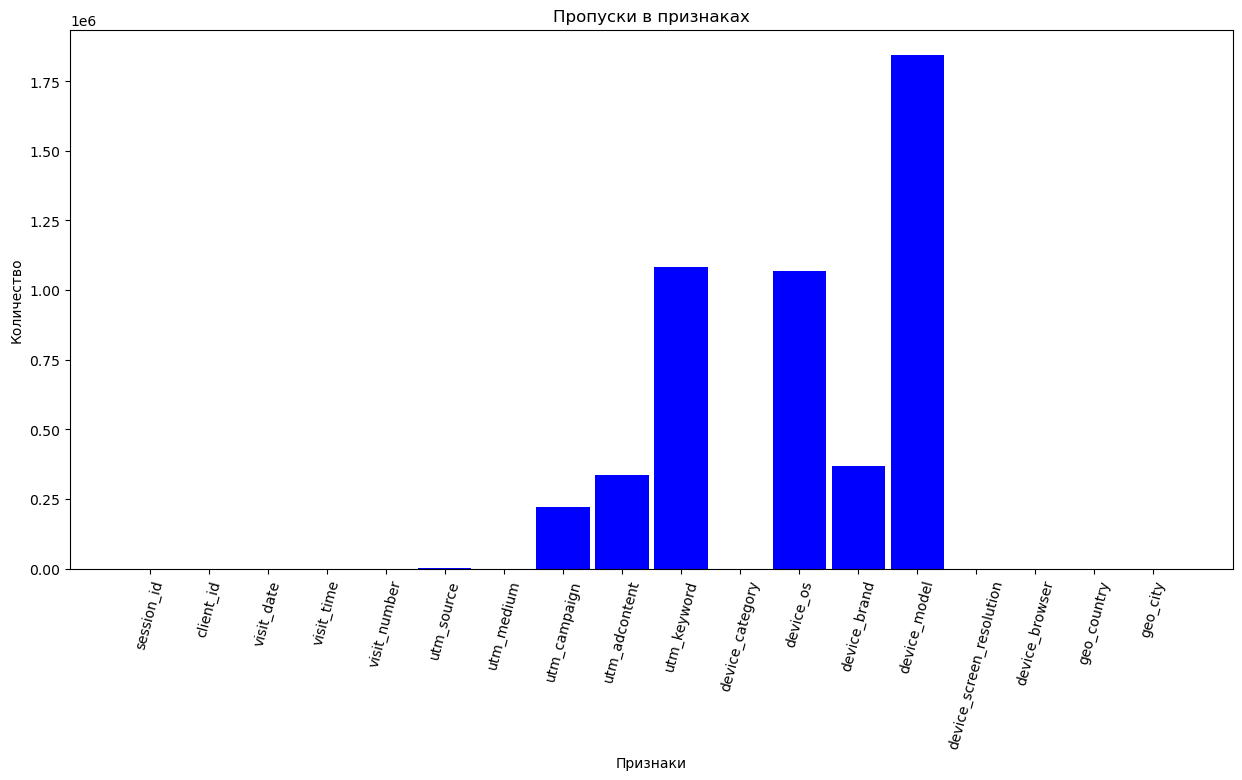

In [6]:
df_isna_1 = pd.DataFrame()
df_isna_1['columns'] = df_sessions_clean.columns
df_isna_1['isna'] = df_sessions_clean.isna().sum().tolist()

plt.figure(figsize = (15, 7))
plt.bar(df_isna_1['columns'], df_isna_1['isna'], width = 0.9, color = ['blue'])
plt.xlabel('Признаки')
plt.xticks(rotation = 75)
plt.ylabel('Количество')
plt.title('Пропуски в признаках')

In [7]:
df_hits_clean.isna().sum().sort_values(ascending=False) / len(df_hits_clean)

event_value       1.000000
hit_time          0.582478
hit_referer       0.398996
event_label       0.239099
session_id        0.000000
hit_date          0.000000
hit_number        0.000000
hit_type          0.000000
hit_page_path     0.000000
event_category    0.000000
event_action      0.000000
dtype: float64

Text(0.5, 1.0, 'Пропуски в признаках')

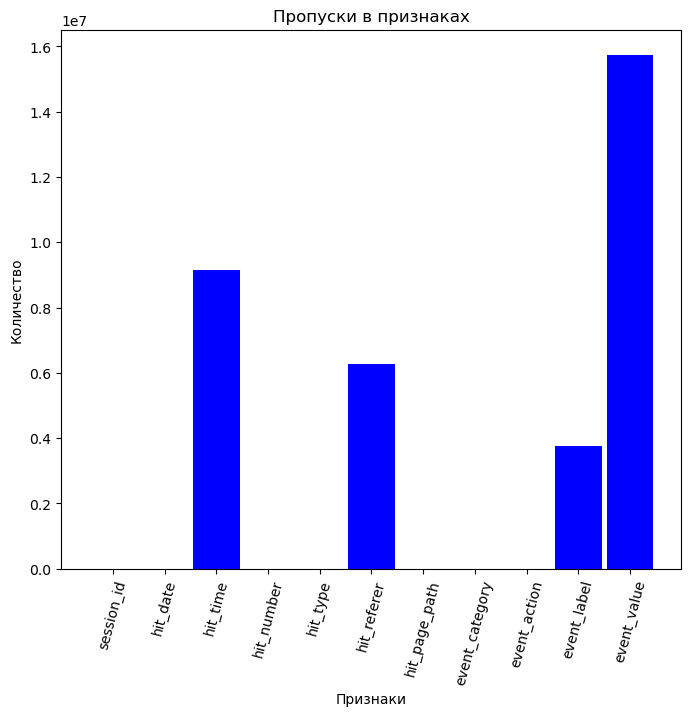

In [8]:
df_isna_2 = pd.DataFrame()
df_isna_2['columns'] = df_hits_clean.columns
df_isna_2['isna'] = df_hits_clean.isna().sum().tolist()

plt.figure(figsize = (8, 7))
plt.bar(df_isna_2['columns'], df_isna_2['isna'], width = 0.9, color = ['blue'])
plt.xlabel('Признаки')
plt.xticks(rotation = 75)
plt.ylabel('Количество')
plt.title('Пропуски в признаках')

In [9]:
# Удаление атрибутов с заполненостью менее половины
columns_drop_sessions = ['device_model', 'utm_keyword', 'device_os']
df_sessions_clean = df_sessions_clean.drop(columns = columns_drop_sessions)

columns_drop_hits = ['event_value', 'hit_time']
df_hits_clean = df_hits_clean.drop(columns = columns_drop_hits)

### Работа с дубликатами

In [10]:
# Проверка наличия дубликатов
df_sessions_clean[df_sessions_clean.duplicated()].count()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
device_category             0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

In [11]:
df_hits_clean[df_hits_clean.duplicated()].count()

session_id        2325
hit_date          2325
hit_number        2325
hit_type          2325
hit_referer       2293
hit_page_path     2325
event_category    2325
event_action      2325
event_label       2325
dtype: int64

In [12]:
# Удаление дубликатов
df_hits_clean = df_hits_clean.drop_duplicates()

### Работа с пропусками

In [13]:
# Замена пропусков на самые популярные их значения
df_sessions_clean.device_brand = df_sessions_clean.device_brand.fillna(df_sessions_clean.device_brand.mode()[0])
# Замена пропусков на значение 'other'
df_sessions_clean[['utm_adcontent', 'utm_campaign', 'utm_source']] = df_sessions_clean[['utm_adcontent', 'utm_campaign', 'utm_source']].fillna('other')
pd.options.mode.chained_assignment = None
df_hits_clean[['hit_referer', 'event_label']] = df_hits_clean[['hit_referer', 'event_label']].fillna('other')

In [14]:
# Повторная проверка на наличие пропусков
df_sessions_clean.isna().sum().sort_values(ascending=False)

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
device_category             0
device_brand                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
dtype: int64

In [15]:
df_hits_clean.isna().sum().sort_values(ascending=False)

session_id        0
hit_date          0
hit_number        0
hit_type          0
hit_referer       0
hit_page_path     0
event_category    0
event_action      0
event_label       0
dtype: int64

###  Приведение типов

In [16]:
# Приведение к типу целого числа
df_sessions_clean.visit_number = df_sessions_clean.visit_number.astype(int)
df_hits_clean.hit_number = df_hits_clean.hit_number.astype(int)
# Приведение к дата/время типу
df_sessions_clean['visit_date/time'] = pd.to_datetime(df_sessions_clean.visit_date + ' ' + df_sessions_clean.visit_time, utc = True)
df_sessions_clean = df_sessions_clean.drop('visit_date', axis = 1)
df_sessions_clean = df_sessions_clean.drop('visit_time', axis = 1)
df_hits_clean.hit_date =  pd.to_datetime(df_hits_clean.hit_date, utc = True)

In [17]:
# Проверка типов признаков
df_sessions_clean.dtypes

session_id                               object
client_id                                object
visit_number                              int32
utm_source                               object
utm_medium                               object
utm_campaign                             object
utm_adcontent                            object
device_category                          object
device_brand                             object
device_screen_resolution                 object
device_browser                           object
geo_country                              object
geo_city                                 object
visit_date/time             datetime64[ns, UTC]
dtype: object

In [18]:
df_hits_clean.dtypes

session_id                     object
hit_date          datetime64[ns, UTC]
hit_number                      int32
hit_type                       object
hit_referer                    object
hit_page_path                  object
event_category                 object
event_action                   object
event_label                    object
dtype: object

### Объединение таблиц

In [19]:
df_full = pd.merge(left=df_hits_clean, right=df_sessions_clean, on='session_id')
df_full

,session_id,hit_date,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,client_id,...,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,visit_date/time
0,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,30,event,other,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,other,1313077071.1640254048,...,cpc,other,other,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-12-23 13:07:36+00:00
1,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,12,event,other,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,view_new_card,other,1313077071.1640254048,...,cpc,other,other,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-12-23 13:07:36+00:00
2,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,18,event,other,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,view_new_card,other,1313077071.1640254048,...,cpc,other,other,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-12-23 13:07:36+00:00
3,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,20,event,other,sberauto.com/cars/all/volkswagen/tiguan/0208cd...,card_web,view_new_card,other,1313077071.1640254048,...,cpc,other,other,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-12-23 13:07:36+00:00
4,5639623078712724064.1640254056.1640254056,2021-12-23 00:00:00+00:00,8,event,other,sberauto.com/cars/all/kia/seltos/20f30855?utm_...,card_web,view_new_card,other,1313077071.1640254048,...,cpc,other,other,mobile,Huawei,360x780,Chrome,Russia,Saint Petersburg,2021-12-23 13:07:36+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15682889,1706097853564481669.1640267190.1640267190,2021-12-23 00:00:00+00:00,1,event,other,sberauto.com/moskva/cars?datefrom=2021&rental_...,quiz,quiz_show,other,397231861.1640263813,...,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Apple,428x926,Safari,Russia,Moscow,2021-12-23 16:46:30+00:00
15682890,8262758806963127884.1640272536.1640272536,2021-12-23 00:00:00+00:00,1,event,other,sberauto.com/cars/all/renault/logan/8c3c73f2?u...,quiz,quiz_show,other,1923823451.1640269388,...,blogger_channel,foFTSdUvNqqkPzZvgiqt,DZYjhfIUfdqhfuTNUmjn,mobile,Realme,360x800,Chrome,Russia,Ulyanovsk,2021-12-23 18:15:36+00:00
15682891,3349670872968620291.1640264206.1640264206,2021-12-23 00:00:00+00:00,1,event,other,sberauto.com/cars/all/kia/rio/fee33fe6?rental_...,quiz,quiz_show,other,779906025.1640261891,...,cpa,mSVMBvlHFgftJaQAZEdp,other,mobile,Apple,375x667,Safari (in-app),Russia,Samara,2021-12-23 15:56:46+00:00
15682892,1009509786569589790.1640244938.1640244938,2021-12-23 00:00:00+00:00,3,event,other,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,other,235044813.1640154142,...,cpc,other,other,desktop,Apple,1366x768,Edge,Russia,Orenburg,2021-12-23 10:35:38+00:00


### Создание новых признаков

In [20]:
# Создание признака отвечающего на вопрос: выполнено целевое действие(target) или нет(not_target)
target_action = ['sub_car_claim_click', 'sub_car_claim_submit_click', 'sub_open_dialog_click', 'sub_custom_question_submit_click', 
                 'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success', 'sub_car_request_submit_click']
df_full['target_action'] = df_full['event_action'].apply(lambda x: 'target' if x in target_action else 'not_target')

In [21]:
# Создание признака: органический трафик(organic) или платный(paid)
type_of_traffic = ['organic', 'referral', '(none)']
df_full['type_of_traffic'] = df_full['utm_medium'].apply(lambda x: 'organic' if x in type_of_traffic else 'paid')

In [22]:
# Создание признака: трафик с мобильных устройств(mobile) или десктопных(desktop)
traffic_device = ['mobile', 'tablet']
df_full['traffic_device'] = df_full['device_category'].apply(lambda x: 'mobile' if x in traffic_device else 'desktop')

In [23]:
# Создание признака: город присутствия(city_of_presence) или иные регионы(other_regions)
traffic_city = ['Saint Petersburg', 'Moscow', 'Podolsk', 'Korolyov', 'Kolomna','Losino-Petrovsky', 'Elektrogorsk', 'Protvino',
                'Klimovsk', 'Tomilino', 'Petrovo-Dalneye', 'Pushkino', 'Dmitrov', 'Sergiyev Posad', 'Odintsovo', 'Lobnya', 'Yegoryevsk',
                'Kotelniki', 'Mytishchi', 'Naro-Fominsk', 'Dzerzhinsky', 'Krasnogorsk', 'Balashikha', 'Zheleznodorozhny', 'Serpukhov',
                'Shchyolkovo', 'Vidnoye', 'Kraskovo', 'Khotkovo', 'Kubinka', 'Chernogolovka', 'Dolgoprudny', 'Khimki', 'Golitsyno',
                'Ramenskoye', 'Dubna', 'Likino-Dulyovo', 'Ivanteyevka', 'LesnoyGorodok', 'Istra', 'SaintPetersburg', 'Orekhovo-Zuyevo',
                'Voskresensk', 'Fryazino']
df_full['traffic_city'] = df_full['geo_city'].apply(lambda x: 'city_of_presence' if x in traffic_city else 'other_regions')

In [24]:
# Создание признака(марка автомобиля)
cars_brand = ['kia', 'volkswagen', 'volvo', 'skoda', 'nissan', 'mercedes-benz', 'bmw', 'toyota', 'audi', 'haval', 'peugeot',
             'porsche', 'renault', 'lada-vaz', 'mini', 'lexus', 'land-rover', 'honda', 'ford', 'mitsubishi', 'hyundai',
             'citroen', 'infiniti', 'chevrolet', 'chery', 'geely', 'jeep', 'opel', 'subaru', 'ravon', 'daewoo', 'jaguar', 
             'great-wall', 'cadillac', 'mazda', 'alfa-romeo','uaz', 'lifan']
df_full['cars_brand'] = df_full.hit_page_path.apply(lambda x : x.split('/')).apply(lambda x : x[3] if len(x)>3 else 'other' ).apply(lambda x : x if x in cars_brand else 'other')

In [25]:
# Создание признака: трафик из соцсетей(soc_net) или другие(other)
soc_networks = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 
                'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']
df_full['soc_networks'] = df_full['utm_source'].apply(lambda x: 'soc_net' if x in soc_networks else 'other')

### Формирование нового DF

In [26]:
# Создание DF с новыми признаками
df_final = df_full[['session_id', 'target_action', 'type_of_traffic', 'traffic_device', 'traffic_city', 'soc_networks']]

In [27]:
# Удаление дубликатов в признаке session_id и заполнение признака target_action(было совершено целевое действие в session_id или  нет) 
df_final = df_final.groupby(['session_id']).max().reset_index()
df_final

,session_id,target_action,type_of_traffic,traffic_device,traffic_city,soc_networks
0,1000009318903347362.1632663668.1632663668,not_target,paid,mobile,other_regions,soc_net
1,1000010177899156286.1635013443.1635013443,not_target,organic,mobile,other_regions,other
2,1000013386240115915.1635402956.1635402956,not_target,paid,mobile,other_regions,other
3,1000017303238376207.1623489300.1623489300,not_target,paid,mobile,other_regions,other
4,1000020580299877109.1624943350.1624943350,not_target,organic,mobile,city_of_presence,other
...,...,...,...,...,...,...
1732261,999960188766601545.1626816843.1626816843,not_target,paid,mobile,city_of_presence,soc_net
1732262,99996598443387715.1626811203.1626811203,not_target,paid,mobile,city_of_presence,other
1732263,999966717128502952.1638428330.1638428330,not_target,paid,mobile,other_regions,other
1732264,999988617151873171.1623556243.1623556243,not_target,paid,mobile,other_regions,other


### Формирование сводных таблиц

In [28]:
df_final.groupby(['type_of_traffic', 'target_action'])['session_id'].count()

type_of_traffic  target_action
organic          not_target        448108
                 target             20812
paid             not_target       1233844
                 target             29502
Name: session_id, dtype: int64

In [29]:
df_final.groupby(['traffic_device', 'target_action'])['session_id'].count()

traffic_device  target_action
desktop         not_target        335378
                target             11513
mobile          not_target       1346574
                target             38801
Name: session_id, dtype: int64

In [30]:
df_final.groupby(['traffic_city', 'target_action'])['session_id'].count()

traffic_city      target_action
city_of_presence  not_target       1075400
                  target             33116
other_regions     not_target        606552
                  target             17198
Name: session_id, dtype: int64

In [31]:
df_final.groupby(['type_of_traffic', 'traffic_device', 'traffic_city', 'target_action'])['session_id'].count()

type_of_traffic  traffic_device  traffic_city      target_action
organic          desktop         city_of_presence  not_target        94189
                                                   target             5316
                                 other_regions     not_target        59302
                                                   target             2882
                 mobile          city_of_presence  not_target       194047
                                                   target             8215
                                 other_regions     not_target       100570
                                                   target             4399
paid             desktop         city_of_presence  not_target       131723
                                                   target             2692
                                 other_regions     not_target        50164
                                                   target              623
                 mobile          ci

In [32]:
df_full.groupby(['cars_brand', 'target_action'])['session_id'].count()

cars_brand     target_action
alfa-romeo     not_target              1
audi           not_target          59878
               target                168
bmw            not_target         189372
               target                936
cadillac       not_target              1
chery          not_target             78
chevrolet      not_target             25
citroen        not_target              2
daewoo         not_target             30
ford           not_target             75
geely          not_target             15
great-wall     not_target              1
haval          not_target          50876
               target                571
honda          not_target            118
               target                  5
hyundai        not_target          16806
               target                326
infiniti       not_target             75
jaguar         not_target              1
jeep           not_target             31
kia            not_target         233021
               target       

In [33]:
df_final.groupby(['soc_networks', 'target_action'])['session_id'].count()

soc_networks  target_action
other         not_target       1429693
              target             46293
soc_net       not_target        252259
              target              4021
Name: session_id, dtype: int64

### Проверка гипотез

In [34]:
# Функция сравнения вероятностей двух биномиальных распределений, 
# уровень значимости равен пяти процентам, критическое значение(Uk) равно 1.96,
# нулевая гипотеза будет приниматься при значении -Uk<U<Uk
def binomial_distribution(m1, n1, m2, n2):
    U = (m1/n1-m2/n2)/((m1+m2)/(n1+n2)*(1-(m1+m2)/(n1+n2))*(1/n1+1/n2))**0.5
    return U

#### Гипотеза 1

In [35]:
# H0 - Органический трафик не отличается от платного с точки зрения CR (Conversion Rate) в целевые события.
# H1 - Органический трафик отличается от платного с точки зрения CR (Conversion Rate) в целевые события.

In [36]:
binomial_distribution(29502, 1263346, 20812, 468920)

-73.23480615931278

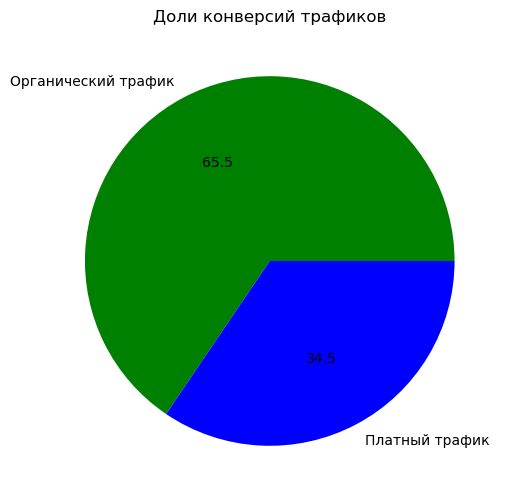

In [37]:
df1 = df_final.groupby(['type_of_traffic', 'target_action'])['session_id'].count()
df1 = df1[1] / (df1[0] + df1[1]) , df1[3] / (df1[2] + df1[3])
plt.figure(figsize=(8,6))
plt.pie(df1, labels = ['Органический трафик', 'Платный трафик'], colors = ['green', 'blue'], autopct = '%.1f')
plt.title('Доли конверсий трафиков')
plt.show()

In [38]:
# Применив биномиальное распределение с уровнем значимости равным пяти процентам, принимаем альтернативную гипотезу.
# С точки зрения конверсии органический трафик больше платного.

#### Гипотеза 2

In [39]:
# H0 - Трафик с мобильных устройств не отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.
# H1 - Трафик с мобильных устройств отличается от трафика с десктопных устройств с точки зрения CR (Conversion Rate) в целевые события.

In [40]:
binomial_distribution(11513, 346891, 38801, 1385375)

16.251501231288383

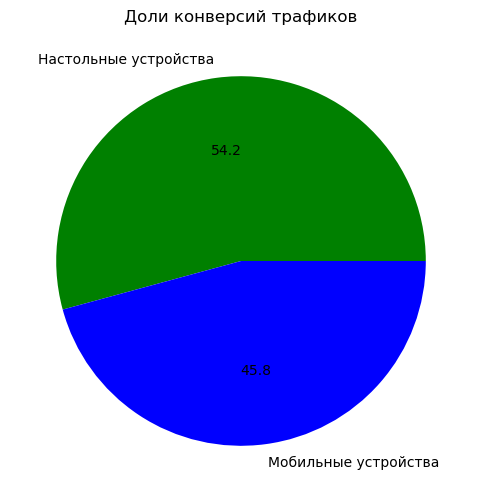

In [41]:
df2 = df_final.groupby(['traffic_device', 'target_action'])['session_id'].count()
df2 = df2[1] / (df2[0] + df2[1]) , df2[3] / (df2[2] + df2[3])
plt.figure(figsize=(8,6))
plt.pie(df2, labels = ['Настольные устройства', 'Мобильные устройства'], colors = ['green', 'blue'], autopct = '%.1f')
plt.title('Доли конверсий трафиков')
plt.show()

In [42]:
# Применив биномиальное распределение с уровнем значимости равным пяти процентам, принимаем альтернативную гипотезу.
# С точки зрения конверсии трафик с настольных устройств больше трафика с мобильных.

#### Гипотеза 3

In [43]:
# H0 - Трафик из городов присутствия (Москва и область, Санкт-Петербург) не отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.
# H1 - Трафик из городов присутствия (Москва и область, Санкт-Петербург) отличается от трафика из иных регионов с точки зрения CR (Conversion Rate) в целевые события.

In [44]:
binomial_distribution( 17198, 623750, 33116, 1108516)

-8.661260170496941

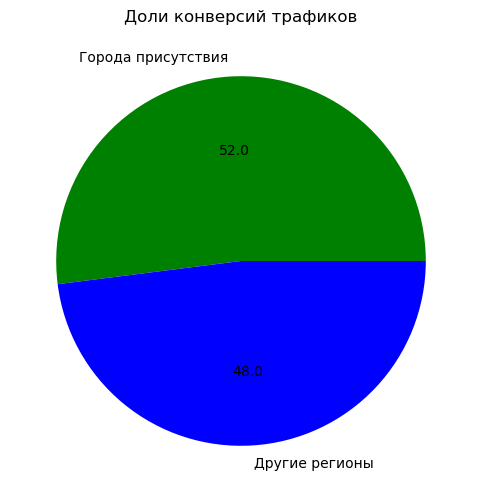

In [45]:
df3 = df_final.groupby(['traffic_city', 'target_action'])['session_id'].count()
df3 = df3[1] / (df3[0] + df3[1]) , df3[3] / (df3[2] + df3[3])
plt.figure(figsize=(8,6))
plt.pie(df3, labels = ['Города присутствия', 'Другие регионы'], colors = ['green', 'blue'], autopct = '%.1f')
plt.title('Доли конверсий трафиков')
plt.show()

In [46]:
# Применив биномиальное распределение с уровнем значимости равным пяти процентам, принимаем альтернативную гипотезу.
# С точки зрения конверсии трафик из городов присутствия больше трафика из других регионов.

#### Вопрос 1

In [47]:
# Из каких источников (кампаний, устройств, локаций) к нам идёт самый целевой трафик (и с точки зрения объёма трафика, и с точки зрения CR)?

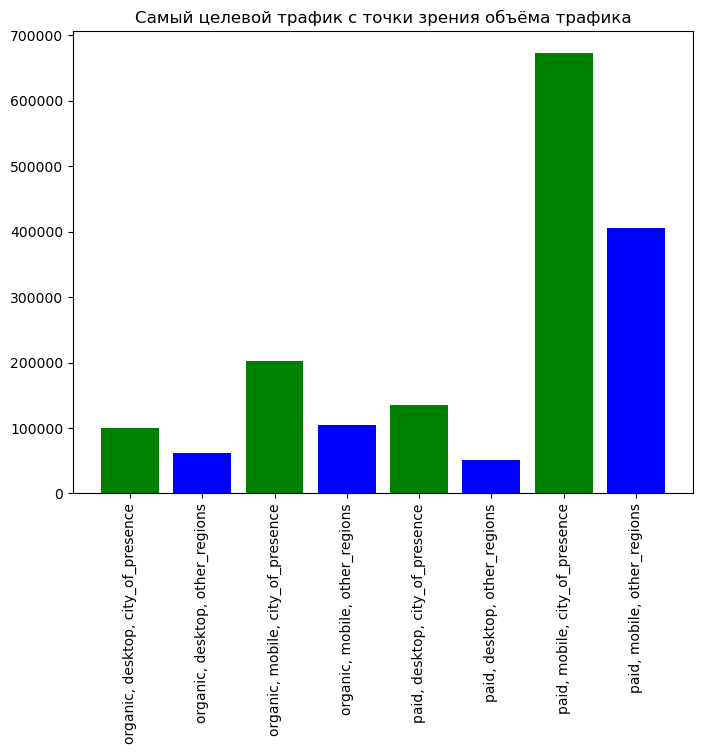

In [48]:
df41 = df_final.groupby(['type_of_traffic', 'traffic_device', 'traffic_city'])['session_id'].count()
df41 = df41.values.tolist()

index = np.arange(8)
labels = ['organic, desktop, city_of_presence', 'organic, desktop, other_regions', 
          'organic, mobile, city_of_presence', 'organic, mobile, other_regions', 
          'paid, desktop, city_of_presence', 'paid, desktop, other_regions', 
          'paid, mobile, city_of_presence', 'paid, mobile, other_regions']
plt.figure(figsize=(8,6))
plt.bar(index, df41, color = ['green', 'blue'])
plt.title('Самый целевой трафик с точки зрения объёма трафика')
plt.xticks(index, labels, rotation = 90)
plt.show()

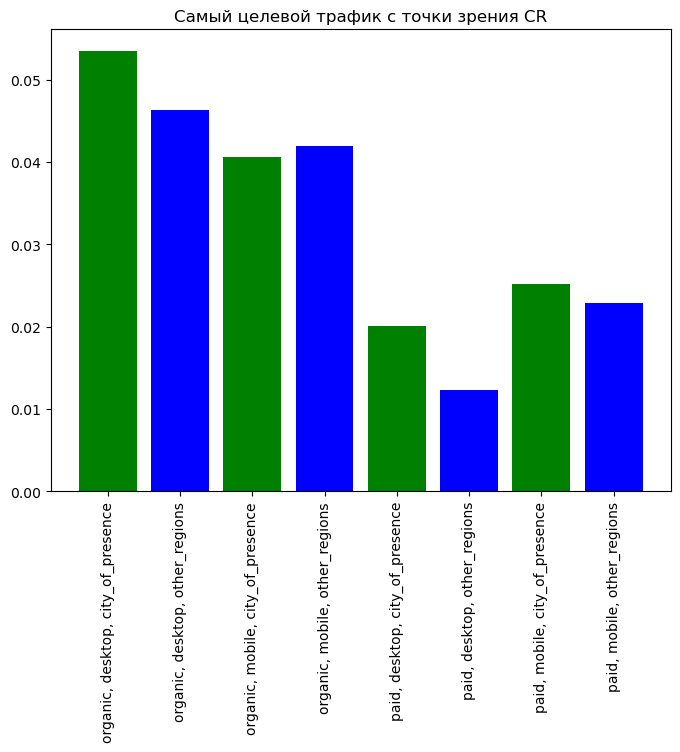

In [49]:
df42 = df_final.groupby(['type_of_traffic', 'traffic_device', 'traffic_city', 'target_action'])['session_id'].count()
df42 = df42.values.tolist()[1:16:2]
n = np.array(df42)
c = np.array(df41)
df42 = list(n / c)

plt.figure(figsize=(8,6))
plt.bar(index, df42, color = ['green', 'blue'])
plt.title('Самый целевой трафик с точки зрения CR')
plt.xticks(index, labels, rotation = 90)
plt.show()

In [50]:
# С точки зрения объёма трафика: самый большой трафик идёт из платного трафика с мобильных устройств из городов присутствия.
# С точки зрения CR: самый большой показатель конверсии трафика идёт из органического трафика с настольных устройств из городов присутствия.

#### Вопрос 2

In [51]:
# Какие авто пользуются наибольшим спросом? У каких авто самый лучший показатель CR (Conversion Rate) в целевые события?

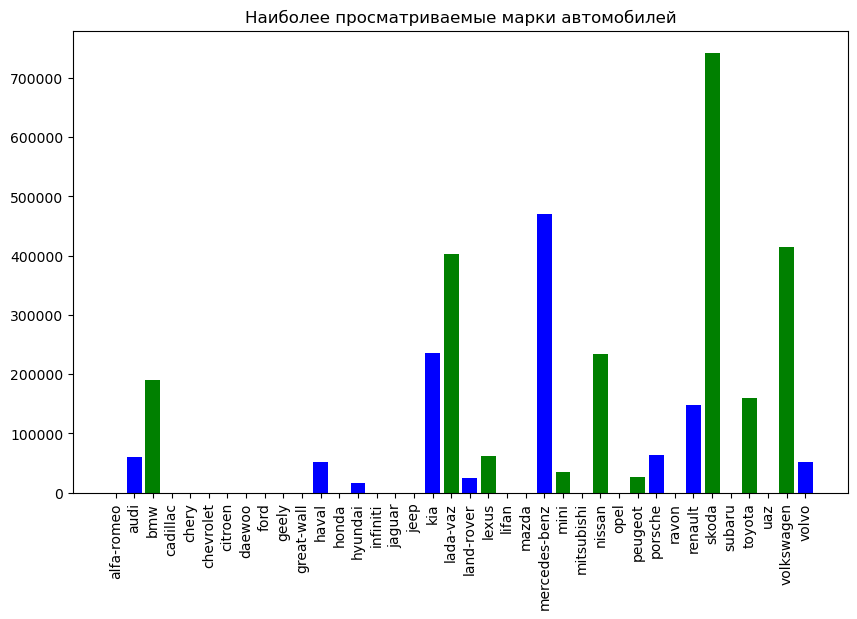

In [52]:
df51 = df_full.groupby(['cars_brand'])['session_id'].count().drop('other')
index2 = np.arange(38)
labels2 = ['alfa-romeo', 'audi', 'bmw', 'cadillac', 'chery', 'chevrolet', 'citroen', 'daewoo', 'ford', 'geely', 
           'great-wall', 'haval', 'honda', 'hyundai', 'infiniti', 'jaguar', 'jeep', 'kia', 'lada-vaz', 'land-rover',
           'lexus', 'lifan', 'mazda', 'mercedes-benz', 'mini', 'mitsubishi', 'nissan', 'opel', 'peugeot', 'porsche', 
           'ravon', 'renault', 'skoda', 'subaru', 'toyota', 'uaz', 'volkswagen', 'volvo']
labels2_target = ['audi', 'bmw', 'haval', 'honda', 'hyundai', 'kia', 'lada-vaz', 'land-rover', 'lexus', 'mercedes-benz',
                  'mini', 'nissan', 'peugeot', 'porsche', 'renault', 'skoda', 'toyota', 'volkswagen', 'volvo']
labels2_not_target = ['alfa-romeo', 'cadillac', 'chery', 'chevrolet', 'citroen', 'daewoo', 'ford', 'geely', 'great-wall', 'infiniti', 
                      'jaguar', 'jeep', 'lifan', 'mazda', 'mitsubishi', 'opel', 'ravon', 'subaru', 'uaz']
plt.figure(figsize=(10,6))
plt.bar(index2, df51, color = ['green', 'blue'])
plt.title('Наиболее просматриваемые марки автомобилей')
plt.xticks(index2, labels2, rotation = 90)
plt.show()

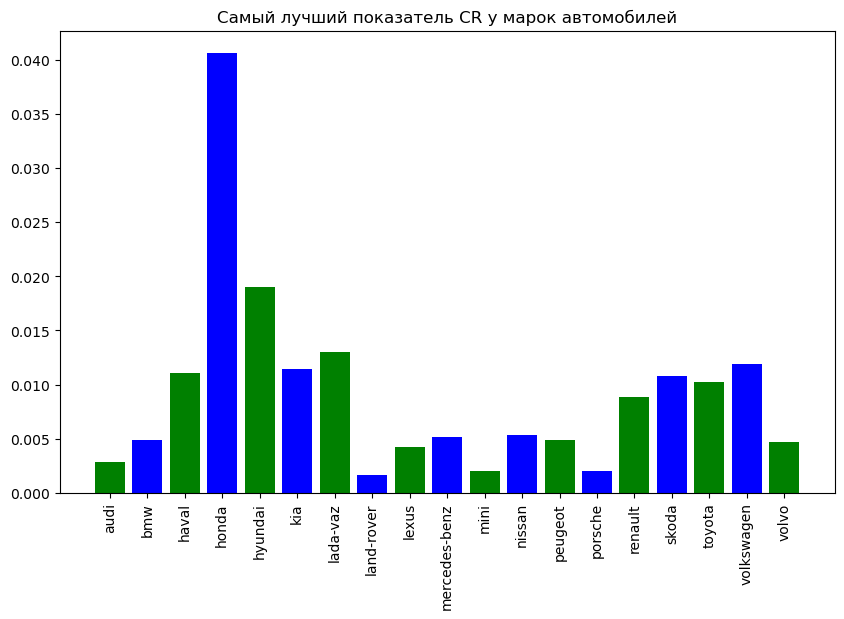

In [53]:
df51_target = df51.drop(labels2_not_target)
df52 = df_full[df_full.target_action == 'target'].groupby(['cars_brand'])['session_id'].count().drop('other')
index3 = np.arange(19)
n = np.array(df52)
c = np.array(df51_target)
df52 = list(n / c)

plt.figure(figsize=(10,6))
plt.bar(index3, df52, color = ['green', 'blue'])
plt.title('Самый лучший показатель CR у марок автомобилей')
plt.xticks(index3, labels2_target, rotation = 90)
plt.show()

In [54]:
# Наиболее просматриваемые марки автомобилей: skoda, mercedes-benz, volkswagen, lada-vaz, kia.
# Самый лучший показатель CR: honda, hyundai, lada-vaz, volkswagen, kia.

#### Вопрос 3

In [55]:
# Стоит ли нам увеличивать своё присутствие в соцсетях и давать там больше рекламы?

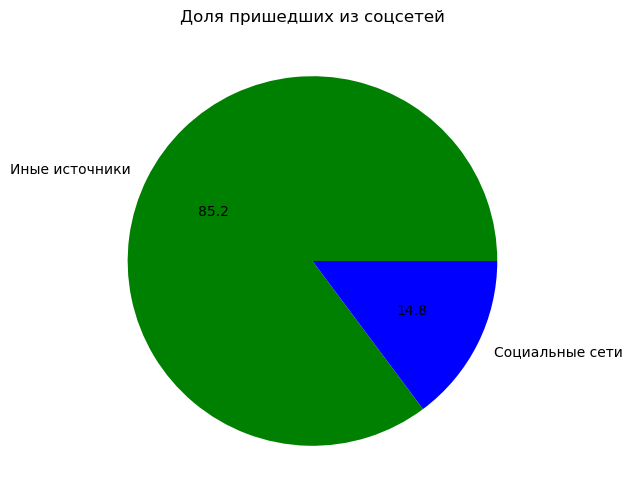

In [56]:
df61 = df_final.groupby(['soc_networks'])['session_id'].count()
plt.figure(figsize=(8,6))
plt.pie(df61, labels = ['Иные источники', 'Социальные сети'], colors = ['green', 'blue'], autopct = '%.1f')
plt.title('Доля пришедших из соцсетей')
plt.show()

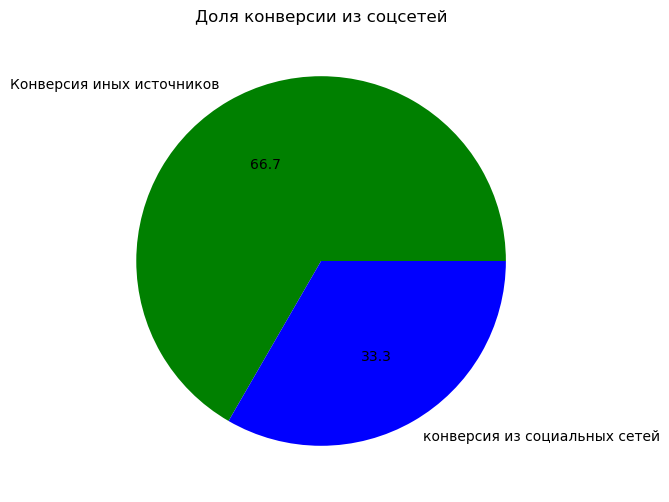

In [57]:
df62 = df_final.groupby(['target_action', 'soc_networks'])['session_id'].count().drop('not_target')
n = np.array(df62)
c = np.array(df61)
df62 = list(n / c)

plt.figure(figsize=(8,6))
plt.pie(df62, labels = ['Конверсия иных источников', 'конверсия из социальных сетей'], colors = ['green', 'blue'], autopct = '%.1f')
plt.title('Доля конверсии из соцсетей')
plt.show()

In [58]:
# Пришедшие из соцсетей составляют 15% от общего трафика, а их конверсия 33% от общей. 
# Однозначно стоит увеличить присутствие в соцсетях и давать там больше рекламы, 
# процент пришедших из соцсетей небольшой, а конверсия отличная, больше чем из других источников. 

# Результат

In [1]:
# 1. С точки зрения конверсии органический трафик больше платного, трафик с настольных устройств больше трафика с мобильных 
# и трафик из городов присутствия больше трафика из других регионов.
# 2. Самый большой трафик идёт из платного трафика с мобильных устройств из городов присутствия.
# 3. Самый большой показатель конверсии трафика идёт из органического трафика с настольных устройств из городов присутствия.
# 4. Наиболее просматриваемые марки автомобилей: skoda, mercedes-benz, volkswagen, lada-vaz, kia.
# 5. Самый лучший показатель CR у марок авто: honda, hyundai, lada-vaz, volkswagen, kia.
# 6. Пришедшие из соцсетей составляют 15% от общего трафика, а их конверсия 33% от общей (процент пришедших из соцсетей небольшой, а конверсия отличная).
# Однозначно стоит увеличить присутствие в соцсетях и давать там больше рекламы, проанализировать используемые соцсети 
# и соцсети в которые можно войти.